# Data Exploration - "The Office" Dataset

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [5]:
PATH = "../data/"
FILE = "the-office-lines - scripts.csv"

df = pd.read_csv(PATH+FILE, sep=",", index_col="id")
df

,season,episode,scene,line_text,speaker,deleted
id,,,,,,
1,1,1,1,All right Jim. Your quarterlies look very good...,Michael,False
2,1,1,1,"Oh, I told you. I couldn't close it. So...",Jim,False
3,1,1,1,So you've come to the master for guidance? Is ...,Michael,False
4,1,1,1,"Actually, you called me in here, but yeah.",Jim,False
5,1,1,1,"All right. Well, let me show you how it's done.",Michael,False
...,...,...,...,...,...,...
59905,9,23,112,It all seems so very arbitrary. I applied for ...,Creed,False
59906,9,23,113,I just feel lucky that I got a chance to share...,Meredith,False
59907,9,23,114,I���m happy that this was all filmed so I can ...,Phyllis,False


In [6]:
df.to_excel("../test.xlsx")

In [7]:
df.shape

(59909, 6)

- The dataset includes 59909 rows (=lines spoken in the show) and 6 columns. 
- The first three columns indicate the season, episode and scene number of the line. 
- "line_text" contains the respective line in plain text. 
- The column "speaker" shows the name of the person who said the corresponding line. 
- Another column "deleted" indicates whether or not the corresponding line made it into the final version of the show.

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 59909 entries, 1 to 59909
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   season     59909 non-null  int64 
 1   episode    59909 non-null  int64 
 2   scene      59909 non-null  int64 
 3   line_text  59909 non-null  object
 4   speaker    59909 non-null  object
 5   deleted    59909 non-null  bool  
dtypes: bool(1), int64(3), object(2)
memory usage: 2.8+ MB


- no missing values
- correct dtypes

In [9]:
df.describe(include="all")

,season,episode,scene,line_text,speaker,deleted
count,59909.000000,59909.000000,59909.000000,59909,59909,59909
unique,NaN,NaN,NaN,52185,797,2
top,NaN,NaN,NaN,Yeah.,Michael,False
freq,NaN,NaN,NaN,486,12137,57973
mean,5.348178,11.558597,27.143852,NaN,NaN,NaN
std,2.389427,6.986208,17.860616,NaN,NaN,NaN
min,1.000000,1.000000,1.000000,NaN,NaN,NaN
25%,3.000000,5.000000,14.000000,NaN,NaN,NaN
50%,5.000000,11.000000,25.000000,NaN,NaN,NaN
75%,7.000000,18.000000,37.000000,NaN,NaN,NaN


- 9 seasons with a maximum of 26 episodes with at most 116 scenes
- 52185 of the 59909 spoken lines are unique
- "Yeah." is the most frequently spoken line with a total of 486 occurrences
- there are 797 different people speaking throughout the show
- Michael is the character with the most lines with total number of 12137 lines
- 57973 of the available 59909 lines actually made it into the final version of the show

Text(0.5, 0, 'lines per speaker')

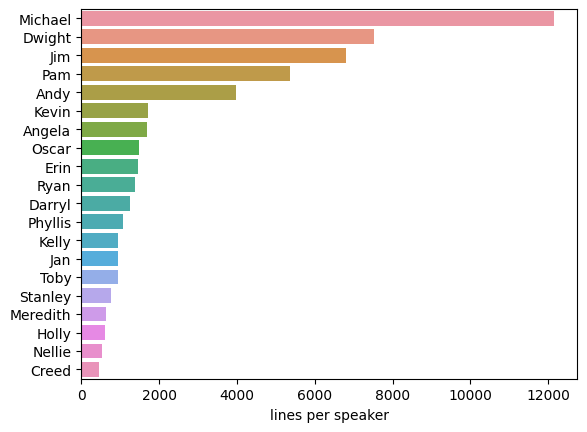

In [10]:
lines_per_character = df["speaker"].value_counts()[:20]
sns.barplot(y=lines_per_character.index, x=lines_per_character)
plt.xlabel("lines per speaker")

C:\Users\ti-he\AppData\Local\Temp\ipykernel_281044\1549812176.py:2: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  words_per_character = df.groupby("speaker").sum()["words_in_line"].sort_values(ascending=False)[:20]


Text(0.5, 0, 'words per speaker')

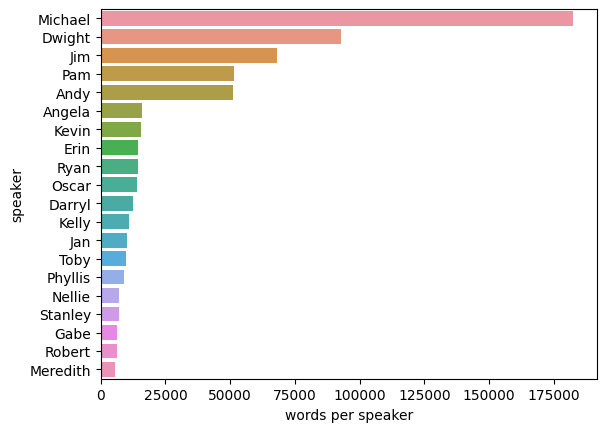

In [11]:
df["words_in_line"] = df["line_text"].apply(lambda x: len(x.split(" ")))
words_per_character = df.groupby("speaker").sum()["words_in_line"].sort_values(ascending=False)[:20]
sns.barplot(y=words_per_character.index, x=words_per_character)
plt.xlabel("words per speaker")

In [12]:
speaker_list = ["Michael", "Dwight", "Jim", "Pam", "Andy"]
df["season_episode"] = df.apply(lambda x: f"{x['season']}{'0' if x['episode']<10 else ''}{x['episode']}", axis=1)
lines_per_speaker_episode = df.loc[df["speaker"].isin(speaker_list)].groupby(["speaker", "season_episode"]).count()["line_text"].reset_index(level=['speaker', 'season_episode']).sort_values("season_episode")

In [13]:
df_lines_per_speaker_episode = pd.DataFrame(columns=["season_episode"]+speaker_list)
df_lines_per_speaker_episode["season_episode"]=lines_per_speaker_episode["season_episode"].unique()
for i in range(len(df_lines_per_speaker_episode)):
    episode = df_lines_per_speaker_episode["season_episode"].iloc[i]
    for speaker in speaker_list:
        df_lines_per_speaker_episode[speaker].iloc[i] = lines_per_speaker_episode[(lines_per_speaker_episode["speaker"]==speaker) & (lines_per_speaker_episode["season_episode"]==episode)].line_text.values
for speaker in speaker_list:
    df_lines_per_speaker_episode[speaker] = df_lines_per_speaker_episode[speaker].apply(lambda x: x[0] if x.size>0 else 0)


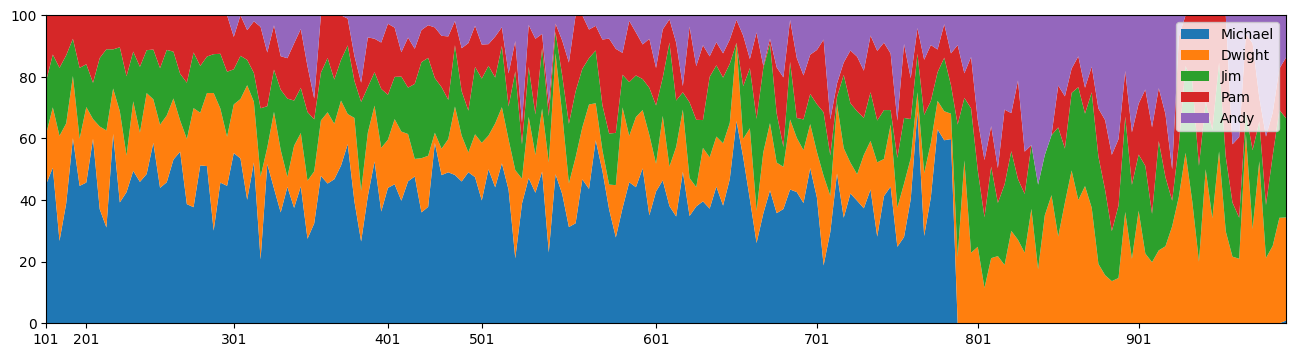

In [14]:
data_perc = df_lines_per_speaker_episode[df_lines_per_speaker_episode.columns[1:]].divide(df_lines_per_speaker_episode[df_lines_per_speaker_episode.columns[1:]].sum(axis=1), axis=0)*100
plt.figure(figsize=(16,4))
plt.stackplot(
    df_lines_per_speaker_episode["season_episode"], 
    data_perc[speaker_list[0]],
    data_perc[speaker_list[1]],
    data_perc[speaker_list[2]],
    data_perc[speaker_list[3]],
    data_perc[speaker_list[4]],
    labels=speaker_list
    )
plt.legend()
plt.xticks(["101", "201", "301", "401", "501", "601", "701", "801", "901"])
plt.margins(0,0)
plt.show()

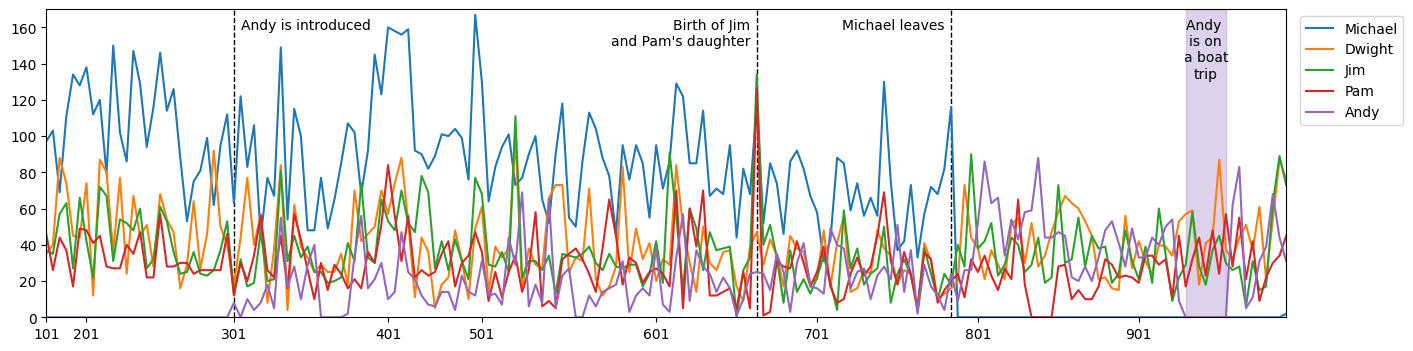

In [15]:
plt.figure(figsize=(16,4))
for speaker in speaker_list:
    plt.plot(df_lines_per_speaker_episode["season_episode"], df_lines_per_speaker_episode[speaker], label=speaker)
    # plt.fill_between(df_lines_per_speaker_episode["season_episode"], df_lines_per_speaker_episode[speaker], alpha=0.2)
plt.legend(bbox_to_anchor=(1.1, 1))
plt.xticks(["101", "201", "301", "401", "501", "601", "701", "801", "901"])
plt.margins(0,0)
plt.vlines(["301", "616", "721"], ymin=0, ymax=170, colors="black", linestyles="--", linewidths=1, zorder=0)
# plt.axvspan("809", "812", color='tab:red', alpha=0.3, zorder=0)
plt.axvspan("908", "914", color='tab:purple', alpha=0.3, zorder=0)
plt.annotate("Andy is introduced", ("302", 165), va="top")
plt.annotate("Michael leaves", ("720", 165), ha="right", va="top")
plt.annotate("Birth of Jim\nand Pam's daughter", ("615", 165), ha="right", va="top")
plt.annotate("Andy \nis on\na boat\ntrip", ("911", 165), ha="center", va="top")
plt.show()

In [16]:
def print_episode(season_episode):
    for e in df.loc[df["season_episode"]==season_episode]["line_text"]: print(e)

In [27]:
fig = px.pie(df.deleted.value_counts().to_frame().reset_index(), values="deleted", names="index", title='Share of deleted lines')
fig.show()

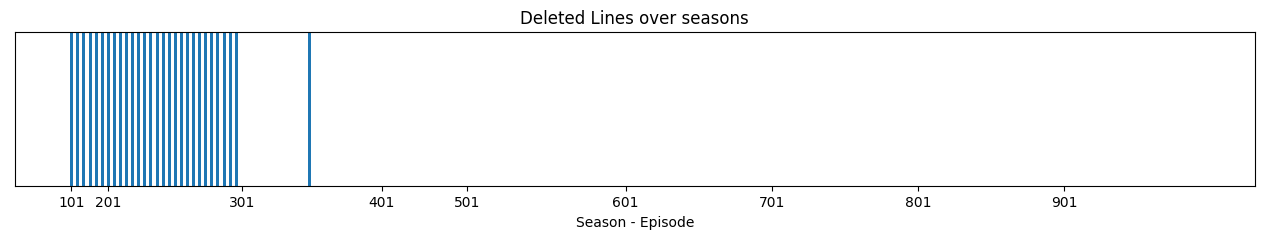

In [53]:
plt.figure(figsize=(16,2))
plt.scatter(df["season_episode"], df["deleted"].sort_index(), alpha=0.5, s=10, c="white")
plt.vlines(df["season_episode"].loc[df["deleted"]==True], ymin=0, ymax=1, linewidths=1)
plt.xticks(["101", "201", "301", "401", "501", "601", "701", "801", "901"])
plt.yticks([])
plt.ylim(0,1)
plt.xlabel("Season - Episode")
plt.title("Deleted Lines over seasons")
plt.show()